In [20]:
import numpy as np
import matplotlib.pyplot as plt

from gfos.data.utils import load_layout
from gfos.utils.plottling import plot_univar_dist

/home/eden/anaconda3/envs/gfos/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eden/anaconda3/envs/gfos/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eden/anaconda3/envs/gfos/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eden/anaconda3/envs/gfos/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

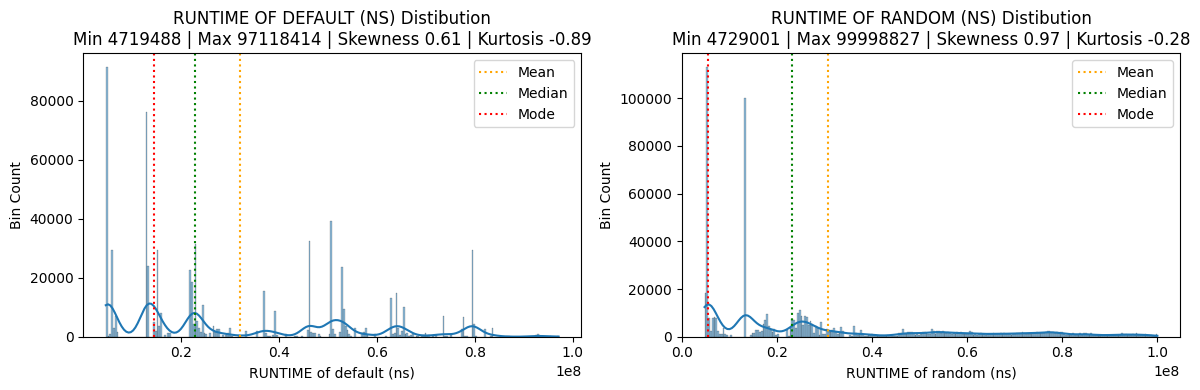

In [25]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, search in enumerate(("default", "random")):
    layout_files = load_layout("../../data/npz_all/npz/layout/", compile_type=search, model_type="xla")

    all_runtime = []

    for file in layout_files["train"]:
        npz = np.load(file)
        runtime = npz["config_runtime"]
        all_runtime.append(runtime) 

    all_runtime = np.concatenate(all_runtime, axis=0)
    plot_univar_dist(all_runtime[all_runtime < 1e8], f"RUNTIME of {search} (ns)", ax=axes[i])

plt.tight_layout()